In [1]:
# Import packages used in the notebook

import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")



Populating the interactive namespace from numpy and matplotlib


# Idea and Hypotheses
People who use the bikes for longer trips tend to be young

Hypothesis: Users who are born before 1960 take trips with shorter duration compared to younger people

Null Hypothesis: On average, the drip duration is the same or longer for a sample of users BORN AFTER 1960 compared to users BORN BEFORE 1960 throughout the timeframe of Jan 2016 - Feb 2016

Alternative Hypothesis: On average, the drip duration is shorter for a sample of users BORN AFTER 1960 compared to users BORN BEFORE 1960 throughout the timeframe of Jan 2016 - Feb 2016

H$_{0}$: T$_{AFTER}$ - T$_{BEFORE}$ $\leqslant$ 0

H$_{1}$: T$_{AFTER}$ - T$_{BEFORE}$ > 0



# Exploratory Data Analysis

In [2]:
# Make sure PUIDATA environmental variable exists and is fool proof

puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/tm1722/PUIdata':
    puidata = '/nfshome/tm1722/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/tm1722/PUIDATA'

In [3]:
# Get the data using the terminal command and store it in PUIDATA folder

#Get data from the web
!curl https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip?accessType=DOWNLOAD > 201601-citibike-tripdata.zip
!curl https://s3.amazonaws.com/tripdata/201602-citibike-tripdata.zip?accessType=DOWNLOAD > 201602-citibike-tripdata.zip    
    
#move it to the PUIDATA folder
!mv 201601-citibike-tripdata.zip $PUIDATA
!mv 201602-citibike-tripdata.zip $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  30.9M      0 --:--:-- --:--:-- --:--:-- 31.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.7M  100 18.7M    0     0  21.2M      0 --:--:-- --:--:-- --:--:-- 21.2M


In [4]:
# Test if we got the data moved 
!ls $PUIDATA

201601-citibike-tripdata.zip
201602-citibike-tripdata.zip
201603-citibike-tripdata.zip
NYPD_Motor_Vehicle_Collisions_direct_download_Sep17_Sep18.csv


In [5]:
# Load data into pandas dataframes

jan = pd.read_csv(os.getenv("PUIDATA") + '/201601' + 
                 '-citibike-tripdata.zip')
feb = pd.read_csv(os.getenv("PUIDATA") + '/201602' + 
                 '-citibike-tripdata.zip')

In [6]:
# Let's start by looking into the January 2016 dataset
jan.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2


In [7]:
# Let's concatenate January and February datasets with pandas concat function
two_months = pd.concat([jan, feb], axis=0)

#let's see if Jan is here
two_months.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2


In [8]:
#let's see if Feb is here
two_months.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
560871,524,2/29/2016 23:59:20,3/1/2016 00:08:04,447,8 Ave & W 52 St,40.763707,-73.985162,514,12 Ave & W 40 St,40.760875,-74.002777,24126,Subscriber,1973.0,2
560872,1120,2/29/2016 23:59:28,3/1/2016 00:18:08,305,E 58 St & 3 Ave,40.760958,-73.967245,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,20535,Subscriber,1966.0,1
560873,301,2/29/2016 23:59:55,3/1/2016 00:04:56,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,3106,Driggs Ave & N Henry St,40.723250,-73.943080,15356,Subscriber,1984.0,1


In [9]:
# See the present columns
two_months.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [10]:
# Create a new categorical variable out of birth year called 
# 'before_or_after' with possible values '1960 AND BEFORE' and 'AFTER 1960'
two_months['before_or_after'] = ''
two_months.loc[(two_months['birth year'] < 1961), 'before_or_after'] = '1960 AND BEFORE'
two_months.loc[(two_months['birth year'] > 1960), 'before_or_after'] = 'AFTER 1960'

two_months.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,before_or_after
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,1960 AND BEFORE
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,AFTER 1960
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,AFTER 1960
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,AFTER 1960
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,1960 AND BEFORE


In [11]:
# let's keep only the columns I need 
two_months = two_months[['tripduration', 'before_or_after']]
two_months.head()

,tripduration,before_or_after
0,923,1960 AND BEFORE
1,379,AFTER 1960
2,589,AFTER 1960
3,889,AFTER 1960
4,1480,1960 AND BEFORE


Text(0.5,0,'Trip Duration (in seconds)')

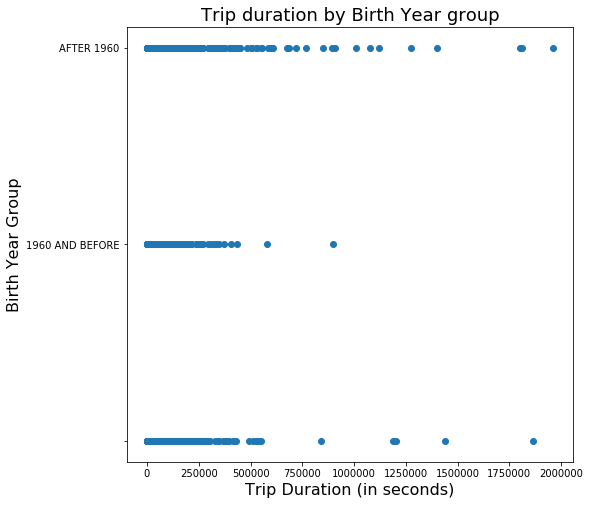

In [12]:
# Let's do a scatterplot of trip duration against before_or_after

pl.figure(figsize=(8,8))
pl.scatter(two_months['tripduration'], two_months['before_or_after'])
pl.title("Trip duration by Birth Year group", fontsize = 18)
pl.ylabel("Birth Year Group", fontsize = 16)
pl.xlabel("Trip Duration (in seconds)", fontsize = 16)


### Figure 1. Scatterplot of Trip Duration (in seconds) against Birth Year Group for Citibike users in January and February 2016

In [13]:
# Looks like we have people with a lot of null values for 
# the before_or_after variable 
# Let's look into this 

two_months.head(100)

,tripduration,before_or_after
0,923,1960 AND BEFORE
1,379,AFTER 1960
2,589,AFTER 1960
3,889,AFTER 1960
4,1480,1960 AND BEFORE
5,332,AFTER 1960
6,2321,AFTER 1960
7,694,AFTER 1960
8,1376,AFTER 1960
9,615,AFTER 1960


In [14]:
# A lot of values are missing. Perhaps, users had the option 
# to give or not to give their DOB to Citibike.
# Maybe something else is going on! 

# This is outside the scope of this homework
# So to save time, let's drop the rows with missing data for any rows with any values 
two_months['before_or_after'].replace('', np.nan, inplace=True)
two_months.dropna(inplace=True)
two_months.head(100)

,tripduration,before_or_after
0,923,1960 AND BEFORE
1,379,AFTER 1960
2,589,AFTER 1960
3,889,AFTER 1960
4,1480,1960 AND BEFORE
5,332,AFTER 1960
6,2321,AFTER 1960
7,694,AFTER 1960
8,1376,AFTER 1960
9,615,AFTER 1960


Text(0.5,0,'Trip Duration (in seconds)')

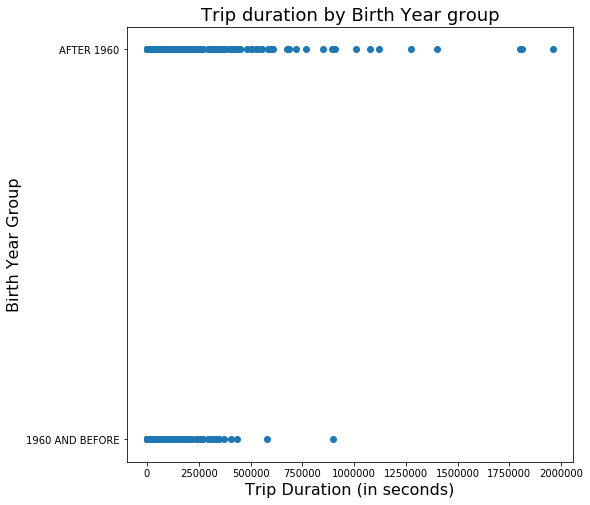

In [15]:
# Let's do the plot again

pl.figure(figsize=(8,8))
pl.scatter(two_months['tripduration'], two_months['before_or_after'])
pl.title("Trip duration by Birth Year group", fontsize = 18)
pl.ylabel("Birth Year Group", fontsize = 16)
pl.xlabel("Trip Duration (in seconds)", fontsize = 16)



### Figure 2. (Filtered) Scatterplot of Trip Duration (in seconds) against Birth Year Group for Citibike users in January and February 2016 

It seems that younger people have longer trip duration. Also, it looks like we have way less users born 1960 and before  

In [16]:
# Let's now do the average duration of trips by group like we wanted initially
avg_by_group = two_months.groupby('before_or_after').mean()
avg_by_group.reset_index(inplace=True)
avg_by_group

,before_or_after,tripduration
0,1960 AND BEFORE,840.429009
1,AFTER 1960,761.866667


Text(0,0.5,'Average Trip Duration (In Seconds)')

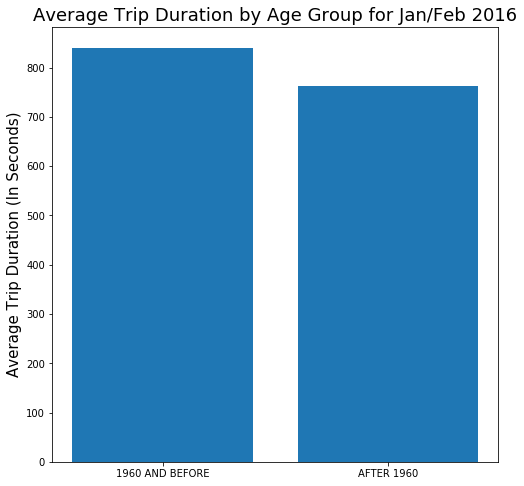

In [17]:
pl.figure(figsize=(8,8))
pl.bar(avg_by_group['before_or_after'], avg_by_group['tripduration'])
plt.title('Average Trip Duration by Age Group for Jan/Feb 2016', fontsize=18)
plt.ylabel('Average Trip Duration (In Seconds)', fontsize=15)

### Figure 3. Barplot of Average Trip Duration by Age Group for Citibike trips in January and February 2016

#### END OF NOTEBOOK 